In [3]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt

In [4]:
sample_onehot = np.identity(16)[0:1]
print(sample_onehot)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [5]:
sample_onehot_two = np.identity(16)[0:2]
print(sample_onehot_two)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
print(np.eye(16)[8:11])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [7]:
print(np.identity(16))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

In [8]:
env = gym.make('FrozenLake-v0')

[2017-04-17 23:26:46,821] Making new env: FrozenLake-v0


In [9]:
def one_hot(x):
    return np.identity(16)[x:x+1]

In [10]:
inputSize = env.observation_space.n
print(inputSize)

16


In [13]:
outputSize = env.action_space.n
print(outputSize)

4


In [20]:
learningRate = 0.1
dis = .99
num_Episodes = 2000

In [15]:
X = tf.placeholder(shape=[1,inputSize],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([inputSize,outputSize],0,0.01))
print(X,W)

Tensor("Placeholder:0", shape=(1, 16), dtype=float32) Tensor("Variable/read:0", shape=(16, 4), dtype=float32)


In [16]:
Q_Predict = tf.matmul(X,W)
Y = tf.placeholder(shape=[1,outputSize],dtype=tf.float32)
print(Q_Predict, Y)

Tensor("MatMul:0", shape=(1, 4), dtype=float32) Tensor("Placeholder_1:0", shape=(1, 4), dtype=float32)


In [17]:
Loss = tf.reduce_sum(tf.square(Y - Q_Predict))
print(Loss)

Tensor("Sum:0", shape=(), dtype=float32)


In [21]:
# (y - Q(S',A' | theta))^2
train = tf.train.GradientDescentOptimizer(learning_rate=learningRate).minimize(Loss)
print(train)

name: "GradientDescent_2"
op: "NoOp"
input: "^GradientDescent_2/update_Variable/ApplyGradientDescent"



In [23]:
# 에피소드 스탭과 전체 보상을 주기위한 배열 변수 
rList =[]

In [24]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_Episodes):
        s = env.reset()
        e = 1. / ((i / 50) + 10)
        rAll = 0
        done = False
        Local_Loss = []
        while not done:
            Q_Network = sess.run(Q_Predict, feed_dict = {X : one_hot(s)})
            
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Q_Network)
            
            s1, reward , done, _ = env.step(a)
            
            if done:
                # Terminal 상태의 세트 값 
                Q_Network[0, a] = reward
            else:
                Q_Network_Next = sess.run(Q_Predict, feed_dict={X:one_hot(s1)})
                # 행동한 action에 대한 Q값만 도출 
                Q_Network[0, a] = reward + dis * (np.max(Q_Network_Next))
            
            sess.run(train, feed_dict={X:one_hot(s), Y:Q_Network})
            rAll += reward
            s = s1
        rList.append(rAll)
        
print(rList, sum(rList))
print("에피소드 성공 퍼센트 : " + str(sum(rList) / num_Episodes) + "%")

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,

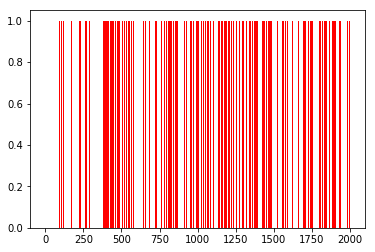

In [26]:
plt.bar(range(len(rList)),rList,color="red")
plt.show()

In [ ]:
# 성능은 일반 Q-Table에 비해 떨어짐.